# Transition dipole matrix elements

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append("../src/")

import partition_energy

def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)

def reconstruct_H(vec, val):
    val_mat = np.empty((len(val), len(val)))
    np.fill_diagonal(val_mat, val)
                       
    return vec @ val_mat @ np.linalg.inv(vec)
    
def reconstruct_val(vec, H):
    
    return (np.linalg.inv(vec) @ H @ vec).diagonal()

In [2]:
run = "10ps_2fs"
fr = 10

hamils = partition_energy.read_splits("hamiltonians", (1000, 28, 28), run)
distances = partition_energy.read_splits("distances", (1000, 27, 27), run)
dipols = partition_energy.read_splits("transition_dipoles", (1000, 27, 3), run)

eigvec = partition_energy.read_splits("eigenvectors", (1000, 28, 28), run)

eigvec = np.transpose(eigvec, (0, 2, 1))

density = np.square(eigvec)

eigval = partition_energy.read_splits("states_energies", (1000, 28), run)

for d, H, vec, val in zip(distances, hamils, eigvec, eigval):
    assert(np.max(val - reconstruct_val(vec, H)) < 1e-10)
    assert(check_symmetric(H))

    assert(check_symmetric(d))
    
site_e = partition_energy.read_splits("transition_energies", (1000, 27), run)

In [3]:
def random_unit_vectors(n):
    rand = np.random.normal(0, 0.01, size=(n, 3))
    
    norms = np.linalg.norm(rand, axis=1)
    norm_stk = np.vstack((norms, norms, norms)).T
    
    return rand/norm_stk


def transition_dipole_matrix_element(eigvec, dipoles):
    res = np.zeros(3)
    
    for i, c in enumerate(eigvec[1:]):
        res += c * dipoles[i]
    
    return res


def probability(eigvec, dipoles):
    tdme  = transition_dipole_matrix_element(eigvec, dipoles)

    e = random_unit_vectors(1000)

    return np.square(np.mean(e @ tdme)), np.sum(np.square(tdme))

lights = np.zeros((1000, 27))
spheres = np.zeros((1000, 27))

for f in range(1000):
    if f % 100 == 0:
        print(".", end="")
    for i in range(1, 28):
        light, sphere = probability(eigvec[f][:, i], dipols[f])
        
        lights[f][i-1] = light
        spheres[f][i-1] = sphere


..........

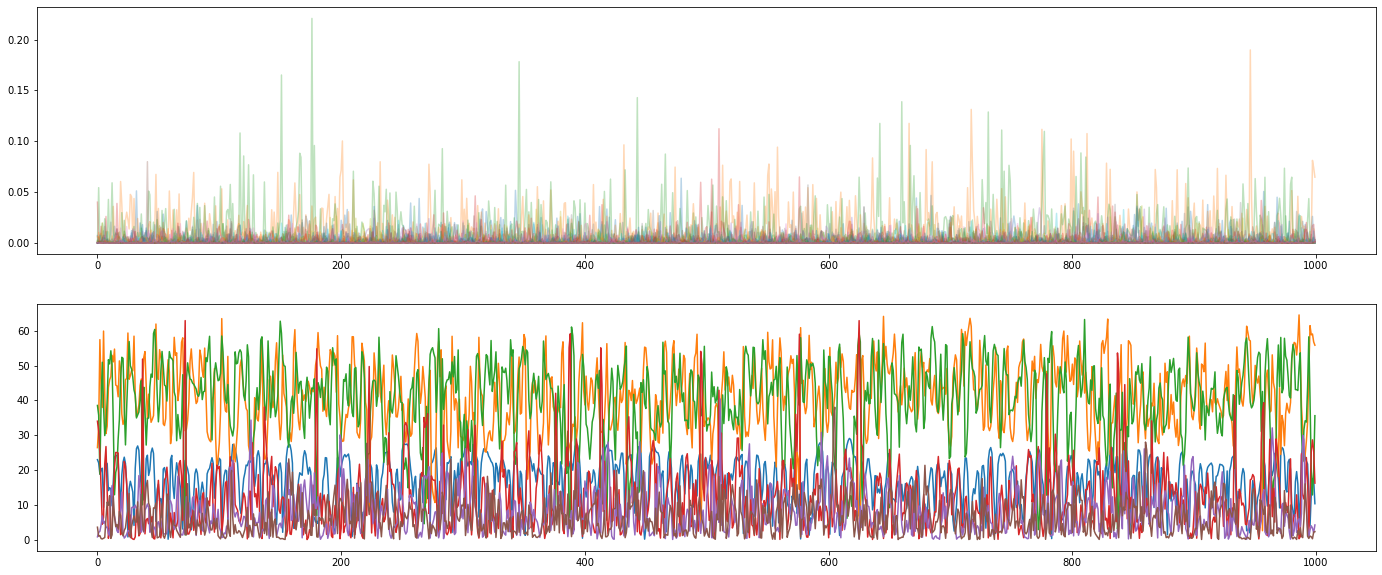

In [4]:
lights[:, 0].shape

fig, ax = plt.subplots(2, 1, figsize=(24, 10))
ax[0].plot(lights, alpha=0.3)
ax[1].plot(spheres[:, 0:6], alpha=1);

In [5]:
for i in range(27):
    print(np.mean(spheres[:, i]))

17.190300905218937
40.835780443055754
40.00012657991136
12.24093959885657
7.75507458647939
6.283927119697842
5.935195356679036
6.126693135608477
6.036517594529289
6.238545232227982
5.8448602342694995
5.6392681442017185
5.104655566590754
4.685805865792792
4.225472976781246
4.06959256969969
3.6461996883310883
3.119014777825904
2.814251256847478
2.6675940604440904
2.231922006662292
1.9061303481090475
1.6880390423314646
1.5113223783514533
1.410712485213216
1.3488761126836695
1.425937554744412


[]

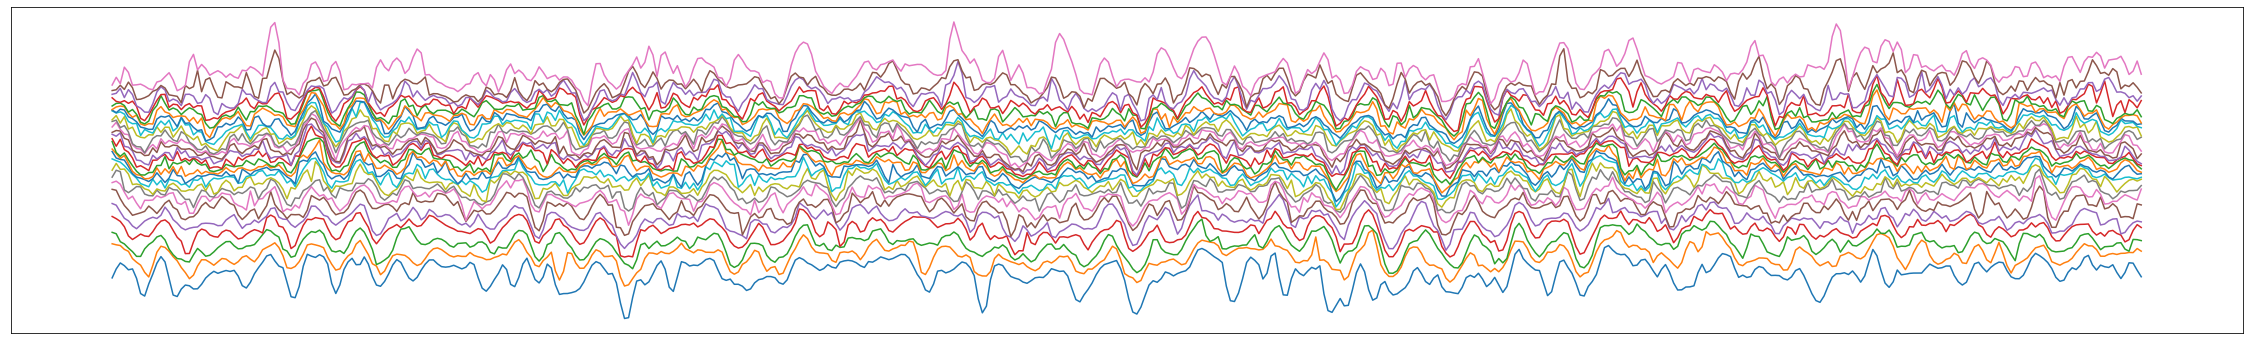

In [19]:
fig, ax = plt.subplots(figsize=(40, 6))

for i in range(1, 28):
    ax.plot((eigval[:, i] - eigval[:, 0])[:500])

ax.set_xticks([])
ax.set_yticks([])